Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test [15 15 15]
Misclassified samples: 1
Accuracy: 0.98


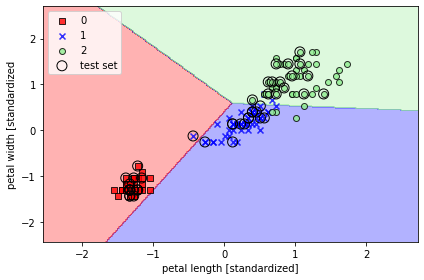

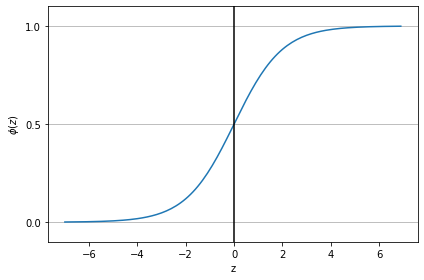

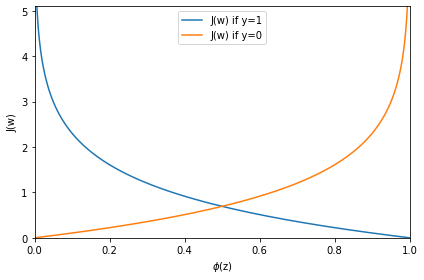

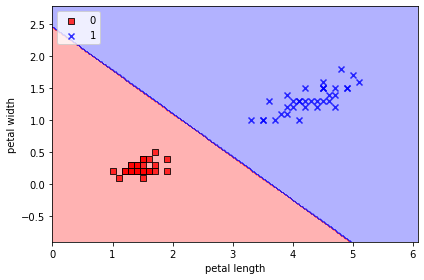

In [1]:
# p52 ch3 scikit-learnの活用
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

iris = datasets.load_iris()
# 3,4列目の特徴量を抽出
# 特徴量は整数ラベルで表すことが慣例となっている(文字ラベルは使わない)
X = iris.data[:, [2, 3]]
# クラスラベルの取得
y = iris.target

# 一意なクラスラベルの出力
print('Class labels:', np.unique(y))

# 全体データの30%をテストデータに分類
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# train_test_splitでデータを勝手にシャッフルしてくれる。
# stratifyで層化サンプリング？？トレーニングとテストに入っているクラスラベル比率が入力データセットと同じくなる。以下確認
print('Labels counts in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test', np.bincount(y_test))

sc = StandardScaler()
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 次はp55~
# パーセプトロンインスタンス作成

# TypeError: __init__() got an unexpected keyword argument 'n_iter'
# versionエラー??
# n_iterをmax_iterに変更することで対処可能。
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
# 誤分類の表示
# max_iterがサンプルと異なる。max_iterにしてるのが原因??
print('Misclassified samples: %d' % (y_test != y_pred).sum())

# 分類の正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


# p56 決定領域のプロットでどの程度識別できるかの可視化
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップ準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のplot
    # -1しているのはindexをそろえるためでいいのかな？？
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # グリッドポイント生成
    # np.arrangeでx1_minからx1_maxまでで,間隔がresolutionになるndarrayを生成。
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    # 予測結果を元のグリッドポイントのデータサイズに変換
    # クラスラベルを予測したあとはxx1,xx2と同じ次元をもつグリッドに作り変えなければならない。
    # なぜ？？？
    Z = Z.reshape(xx1.shape)

    # グリッドポイントの等高線をプロットする
    # contourfのプロットの仕方よくわからん！とりあえず図を塗ってくれることはわかった。
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにサンプルをプロットする
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolors='black')

    # ここが改良部分！！
    #  テストサンプルを目立たせるため点をoで表示
    if test_idx:
        # 全てサンプルをプロット
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolors='black', alpha=1.0,
                    linewidths=1, marker='o', s=100, label='test set')


# トレーニングデータ、テストデータも特徴量を行方向に結合する
X_combined_std = np.vstack((X_train_std, X_test_std))
# トレーニングデータとテストデータのクラスラベル結合
y_combined = np.hstack((y_train, y_test))
# 決定境界プロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# 次はp58のロジスティック回帰から

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)

# y軸の線を追加する
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
# yラベルなんだこれ?? ファイを表したいんだ！！
plt.ylabel('$\phi (z)$')

# y軸の目盛り追加
plt.yticks([0.0, 0.5, 1.0])
# Axesクラスのオブジェクトの取得→pltには複数の流儀があるみたい。
# https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9
ax = plt.gca()
# y軸の目盛りに合わせて水平グリッド線を追加
ax.yaxis.grid(True)
# グラフを表示
plt.tight_layout()
plt.show()


# p63 3-3-2 ロジスティック関数重み学習
# サンプルが正しいクラス1 or 0 に近いとコストは0だが、分類をミスるとコストが無限大に増ることが確認できる
# y=1の時のコストを計算
def cost_1(z):
    return - np.log(sigmoid(z))


# y=0の時のコストを計算
def cost_0(z):
    return - np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
# y=1のコストを計算して表示する
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

# y=0のコストを計算して表示する
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()


# p66 ADALINE実装をロジスティック回帰のアルゴリズムに変換する。
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # コスト計算では誤差平方和じゃなくてロジスティック回帰のコストだよ！！
            cost = -y.dot(np.log(output)) + (1 - y).dot(np.log(1 - output))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # ロジスティックシグモイド活性化関数を計算！！
        # np.clipでndarrayを任意の最小、最大値に収めることができる。
        return 1. / (1 + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        # クラスレベルを返すよ
        return np.where(self.net_input(X) >= 0.0, 1, 0)


# クラス実装終わり。ここから検証(p67)

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




/Users/kazuya/IDEproject/VenvFolda/searchtech/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kazuya/IDEproject/VenvFolda/searchtech/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


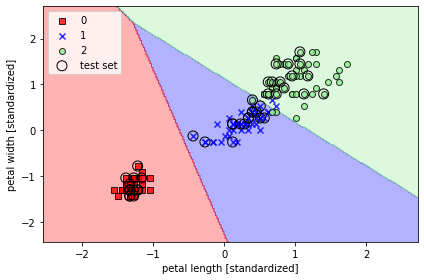

In [4]:
# 3-3-4 scipyを使ったロジスティック回帰モデルのトレーニング
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
# Cは正則化強度の逆数を表し、正の浮動小数点数。値が小さいほど正則化が強い。
# 正則化とは極端なパラメータに重みを持たせ、バリアンスとバイアスのトレードオフの関係を調整するのに使う。(p72参照)
lr=LogisticRegression(C=100.0,random_state=1)
# ミスってx_trainにしてしまったら標準化されないので、全然おかしなグラフが表示された。
lr.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/Users/kazuya/IDEproject/VenvFolda/searchtech/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kazuya/IDEproject/VenvFolda/searchtech/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kazuya/IDEproject/VenvFolda/searchtech/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kazuya/IDEproject/VenvFolda/searchtech/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.

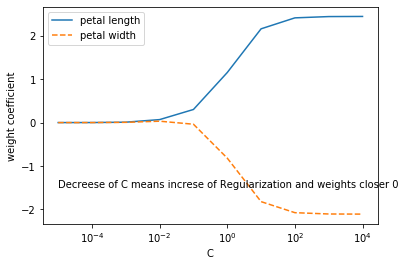

In [11]:
# p75 正則化の強さの可視化
weights,params=[],[]
# 10個の逆正則化パラメータに対するロジスティック回帰モデルをそれぞれ処理する
for c in np.arange(-5,5):
    lr=LogisticRegression(C=10.**c,random_state=1)
    lr.fit(X_train_std,y_train)
    # 重み係数を格納
    weights.append(lr.coef_[1])
    # 逆正則化パラメータを格納
    params.append(10.**c)

# 重み係数をNumpy配列に変換
weights=np.array(weights)
# 横軸に逆正則化パラメータ、縦軸に重み係数をプロット
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
# 横軸を対数スケールにする
plt.xscale('log')
plt.text(10**-5,-1.5,'Decreese of C means increse of Regularization and weights closer 0')
plt.show()
# 高バイアスが学習不足の方！！高バリアンスが過学習
# 

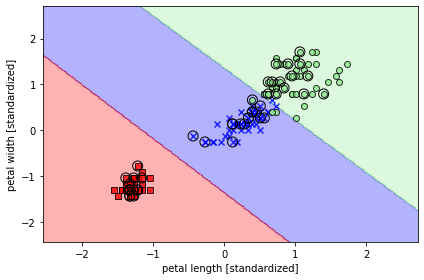

In [12]:
# 3-4 SVM
from sklearn.svm import SVC
# make Linear SVM instance
svm=SVC(kernel='linear',C=1.0,random_state=1)
# adapt traning-data to SVM
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()



##### ロジスティック回帰はSVMよりも外れ値の影響を受けやすいが、実装が簡単で更新しやすいためストリーミングデータなどに適する